## Линейная регрессия

В этом практическом задании четыре обязательных и одна дополнительная задача. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
*Дополнительная задача* для тех, кто хочет потренироваться в подготовке данных для обучения модели и использовании алгоритма линейной регрессии. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться пользоваться моделью линейной регрессии.
2.   Потренироваться в использовании метрики MAE.
3.   Научиться использовать категориальные фичи для задачи линейной регрессии.




В этом практическом задании вы будете работать с данными, которые мы разбирали в видео. В них указаны расходы, выставленные медицинскими страховыми компаниями по клиентам.

Этот датасет мы будем использовать для предсказания расходов по страховке, исходя из характеристик клиента.

**Описание данных:**

*age*: возраст;

*sex*: пол женский/мужской;

*bmi*: индекс массы тела;

*children*: количество детей/иждивенцев, входящих в страховку;

*smoker*: курящий/некурящий;

*region*: район проживания в США, северо-восток, юго-восток, юго-запад, северо-запад;

*charges*: расходы по страховке.

## Обязательные задачи

In [95]:
# импортируем нужные библиотеки
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 

In [96]:
# загрузим датасет и выведем
df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Задача 0. Подготовка данных для обучения**

Проделайте следующие шаги на этом датафрейме:

1. Создайте датафрейм, положите в него данные по клиентам-женщинам, у которых нет детей, и сумма страховки менее 15 тысяч долларов.
2. Постройте график зависимости стоимости страховки от возраста. Проверьте, что у вас получился следующий график.

In [97]:
# Ваш код здесь
df_new = df[(df.children==0) & (df.charges < 15000) & (df.sex == 'female')]
df_new.shape

(228, 7)

In [98]:
# создадим функцию визуализации данных 
def show_age_charges(df):
    plt.plot(df['age'], df.charges, 'ro') 
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')
    plt.show()

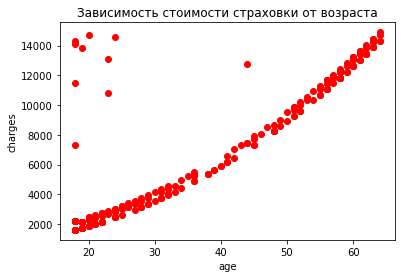

In [99]:
show_age_charges(df_new)

**Задача 1. Удаление выбросов и обучение модели линейной регрессии**

Проделайте следующие шаги:

3. Удалите  значения charges в выбросах, их на картинке 10 штук. Заново отрисуйте график и убедитесь, что выбросы действительно удалены.
4. Поделите данные на треин и тест выборку в отношении 80/20.
5. Обучите модель линейной регрессии с дефолтными параметрами на одной входной фиче: age; померьте качество на тесте с помощью метрики MAE.

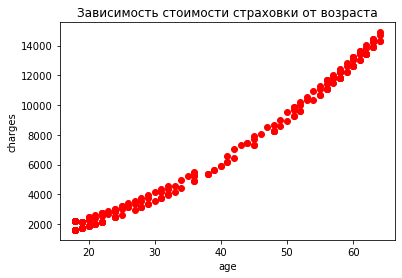

(218, 7)


,age,sex,bmi,children,smoker,region,charges
5,31,female,25.740,0,no,southeast,3756.62160
13,56,female,39.820,0,no,southeast,11090.71780
20,60,female,36.005,0,no,northeast,13228.84695
26,63,female,23.085,0,no,northeast,14451.83515
31,18,female,26.315,0,no,northeast,2198.18985
...,...,...,...,...,...,...,...
1316,19,female,20.600,0,no,southwest,1731.67700
1326,42,female,32.870,0,no,northeast,7050.02130
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [103]:
# Ваш код здесь
index_for_delete = df_new[(df_new.charges > 6000) & (df_new.age < 30)].index
index_for_delete_1 = df_new[(df_new.charges > 12000) & (df_new.age < 50)].index
df_new = df_new.drop(list(index_for_delete) + list(index_for_delete_1))
#df_new = df_new.drop(index_for_delete)
#df_new = df_new.drop(index_for_delete_1)

show_age_charges(df_new)
print(df_new.shape)
df_new_2 = df_new.copy(deep=True) # копируем датафрейм (может понадобится)
df_new_2

(218, 7)


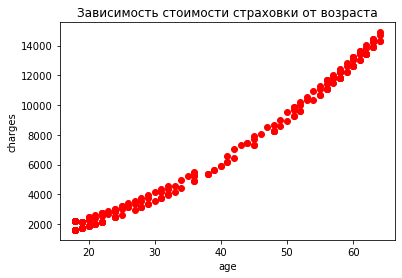

In [104]:
indx = df_new[(df_new.charges >= 6000) & (df_new.age<30)].index
indx1 = df_new[(df_new.charges >= 12000) & (df_new.age<50)].index

df_new = df_new.drop(list(indx) + list(indx1))
print(df_new.shape)

show_age_charges(df_new)

In [105]:
# разобьем датасет на train, test
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

# проведем обучение модели по одному признаку-фиче 'age'
lr = LinearRegression()
lr.fit(train[['age']], train.charges)

# рассчитаем МАЕ
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

589.2828328455392

**Задача 2. Обучение модели линейной регрессии на нескольких фичах**

Обучите модель линейной регрессии с дефолтными параметрами на данных из предыдущего задания на всех непрерывных фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [106]:
# Ваш код здесь
# это здесь для того чтобы знать что делает этот цикл
for col in df_new:
    print(df_new[col].unique().sum())
    #c = df_new[col].value_counts () / len(df_new) == 1
    
    #print(c)
    



1890
female
5532.01
0
no
southeastnortheastnorthwestsouthwest
1469231.4960500002


In [107]:
# Находим фичи, в которых присутствует только одно единственное значение.
for col in df_new:
    print(col, df_new[col].nunique())


age 46
sex 1
bmi 182
children 1
smoker 1
region 4
charges 218


In [108]:
# удаляем фичи, в которых присутствует только одно единственное значение.
print('Удалены следующие фичи:')
for col in df_new:
    if df_new[col].nunique() == 1:
        print(col)
        df_new = df_new.drop(columns = col ,axis = 1)
print('Размерность датафрейма после удаления:', df_new.shape)
df_new        
    
   

Удалены следующие фичи:
sex
children
smoker
Размерность датафрейма после удаления: (218, 4)


,age,bmi,region,charges
5,31,25.740,southeast,3756.62160
13,56,39.820,southeast,11090.71780
20,60,36.005,northeast,13228.84695
26,63,23.085,northeast,14451.83515
31,18,26.315,northeast,2198.18985
...,...,...,...,...
1316,19,20.600,southwest,1731.67700
1326,42,32.870,northeast,7050.02130
1334,18,31.920,northeast,2205.98080
1335,18,36.850,southeast,1629.83350


In [89]:
# удаляем 'region' так как это категориальная фича
df_new = df_new.drop(columns = 'region' ,axis = 1)
print('Размерность датафрейма после удаления:', df_new.shape)
df_new

Размерность датафрейма после удаления: (218, 3)


,age,bmi,charges
5,31,25.740,3756.62160
13,56,39.820,11090.71780
20,60,36.005,13228.84695
26,63,23.085,14451.83515
31,18,26.315,2198.18985
...,...,...,...
1316,19,20.600,1731.67700
1326,42,32.870,7050.02130
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350


In [92]:
# разобьем датасет на train, test
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

# проведем обучение модели по одному признаку-фиче 'age'
lr = LinearRegression()
lr.fit(train.drop(['charges'], axis=1), train.charges)

# рассчитаем МАЕ
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

590.8305083474559

После удаления фич, в которых присутствует только одно единственное значение метрика по сравнению с предыдущим заданием немного улучшилась.

**Задача 3. Обучение модели линейной регрессии с категориальными фичами**

Обучите модель линейной регрессии с дефолтными параметрами на всех фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение. Категориальные фичи преобразуйте с помощью OneHotEncoder.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [118]:
# Ваш код здесь
# Решение (Задача 3)
# смотрим какие колонки удалить
df_new_2.describe(include='all')

,age,bmi,region,charges
count,218.000000,218.000000,218,218.000000
unique,NaN,NaN,4,NaN
top,NaN,NaN,northeast,NaN
freq,NaN,NaN,58,NaN
mean,38.775229,30.310986,NaN,6739.594019
std,16.416243,5.958165,NaN,4455.839013
min,18.000000,17.290000,NaN,1607.510100
25%,22.000000,26.053750,NaN,2475.245350
50%,36.000000,29.925000,NaN,5269.996975
75%,56.000000,34.727500,NaN,11412.150800


In [119]:
# удаляем фичи, в которых присутствует только одно единственное значение.
print('Удалены следующие фичи:')
for col in df_new_2:
    if df_new_2[col].nunique() == 1:
        print(col)
        df_new_2 = df_new_2.drop(columns = col ,axis = 1)
print('Размерность датафрейма после удаления:', df_new_2.shape)
df_new_2   

Удалены следующие фичи:
Размерность датафрейма после удаления: (218, 4)


,age,bmi,region,charges
5,31,25.740,southeast,3756.62160
13,56,39.820,southeast,11090.71780
20,60,36.005,northeast,13228.84695
26,63,23.085,northeast,14451.83515
31,18,26.315,northeast,2198.18985
...,...,...,...,...
1316,19,20.600,southwest,1731.67700
1326,42,32.870,northeast,7050.02130
1334,18,31.920,northeast,2205.98080
1335,18,36.850,southeast,1629.83350


In [120]:
#создание объекта OneHotEncoder
#sparse=False - указывает, что матрица не должна быть в разреженном формате, 
#то есть будет удобной для восприятия
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [122]:
#выведим, какие значения выводит тип топлива
df_new_2.region.unique()

array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object)

In [123]:
#метод fit идентифицируем параметры преобразования
#[[]] потому что можно подать несколько признаков для кодирования
ohe.fit(df_new_2[['region']])

OneHotEncoder(sparse=False)

In [124]:
#проведем преобразования и отобразим результат
ohe_region = ohe.transform(df_new_2[['region']])
ohe_region

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [125]:
#выведим размерность
ohe_region.shape

(218, 4)

In [126]:
#какой регион кодирует каждая строка

ohe.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [127]:
#выведим названия признаоков, которые можно отправить в датафрейм
#x0 - указывает на принадлежность к признаку
ohe.get_feature_names()

array(['x0_northeast', 'x0_northwest', 'x0_southeast', 'x0_southwest'],
      dtype=object)

In [129]:
#добавление новых признаков в датафрейм
df_new_2[ohe.get_feature_names()] = ohe_region
df_new_2 = df_new_2.drop(columns = 'region', axis = 1)
df_new_2


,age,bmi,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
5,31,25.740,3756.62160,0.0,0.0,1.0,0.0
13,56,39.820,11090.71780,0.0,0.0,1.0,0.0
20,60,36.005,13228.84695,1.0,0.0,0.0,0.0
26,63,23.085,14451.83515,1.0,0.0,0.0,0.0
31,18,26.315,2198.18985,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1316,19,20.600,1731.67700,0.0,0.0,0.0,1.0
1326,42,32.870,7050.02130,1.0,0.0,0.0,0.0
1334,18,31.920,2205.98080,1.0,0.0,0.0,0.0
1335,18,36.850,1629.83350,0.0,0.0,1.0,0.0


In [130]:
# разобьем датасет на train, test
train, test = train_test_split(df_new_2, test_size=0.2, random_state=42)

# проведем обучение модели по одному признаку-фиче 'age'
lr = LinearRegression()
lr.fit(train[['age']], train.charges)

# рассчитаем МАЕ
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

589.2828328455392

In [131]:
lr.fit(train.drop(['charges'], axis=1), train.charges)
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

535.5915097964667

## Дополнительные задачи

Попробуйте обучить модель линейной регрессии на всех данных, которые лежат в `insurance.csv`. Чтобы улучшить показание метрики, попробуйте проделать следующие действия:
- проанализируйте данные на выбросы, подумайте над стратегией как с ними работать так, чтобы модель не ухудшала из-за них свою предсказательную способность;
- используйте только значимые фичи, то есть те, которые влияют на целевую переменную (в этом случае может помочь матрица корреляций и построение графиков зависимости категориальных фичей от целевой переменной);
- используйте scaler для преобразования входных данных;
- попробуйте сгенерировать новые фичи (например из `age` сделать различные категории: молодой, старый).


In [133]:
# загрузим датасет и выведем
df_3 = pd.read_csv('data/insurance.csv')
df_3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [184]:
# создадим функцию визуализации данных 
def show_age_charges(df):
    plt.plot(df[column_for_analiz], df.charges, 'ro') 
    plt.xlabel(column_for_analiz)
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')
    plt.show()

In [ ]:
# создадим функцию подсчета квантилей
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

age
count    1338.000
mean       39.207
std        14.050
min        18.000
25%        27.000
50%        39.000
75%        51.000
max        64.000
Name: age, dtype: object  



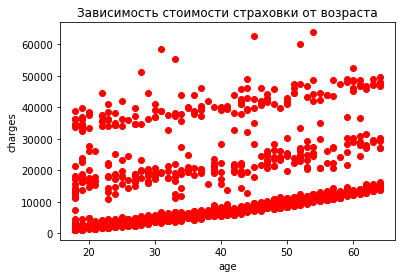

(-9.0, 87.0)
Количество выбросов = 0
------------------------------------------------------- 

bmi
count    1338.000
mean       30.663
std         6.098
min        15.960
25%        26.296
50%        30.400
75%        34.694
max        53.130
Name: bmi, dtype: object  



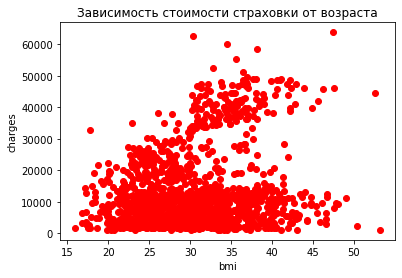

(13.7, 47.290000000000006)
Количество выбросов = 9
------------------------------------------------------- 

children
count    1338.000
mean        1.095
std         1.205
min         0.000
25%         0.000
50%         1.000
75%         2.000
max         5.000
Name: children, dtype: object  



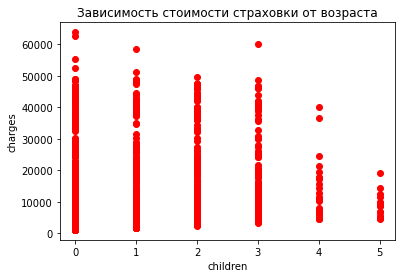

(-3.0, 5.0)
Количество выбросов = 0
------------------------------------------------------- 

charges
count     1338.000
mean     13270.422
std      12110.011
min       1121.874
25%       4740.287
50%       9382.033
75%      16639.913
max      63770.428
Name: charges, dtype: object  



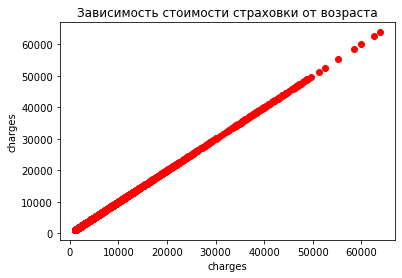

(-13109.1508975, 34489.350562499996)
Количество выбросов = 139
------------------------------------------------------- 



In [197]:
# выведем статистики по численным фичам
for col in df_3: # переберем все столбцы
    if df_3[col].dtype != 'object': # если столбец != 'object'
        print(col)
        print(df_3[col].describe().apply(lambda x: f"{x:0.3f}"), ' \n') # выведем его описание
        # вывод зависимости charges от фичи
        column_for_analiz = col
        show_age_charges(df_3)
        
        # расчет границ квантилей
        boundaries = calculate_outliers(df_3[col])
        boundaries
        print(boundaries)
        
        
        is_outlier = df_3[col] > boundaries[1]
        
        print('Количество выбросов =', is_outlier.sum())
        print('-------------------------------------------------------',  '\n')
        
        
        



        

In [200]:
# Ваш код здесь
df_3_new = df_3[(df_3.children==0) & (df_3.charges < 15000) & (df_3.sex == 'female')]
df_3_new.shape

(228, 7)

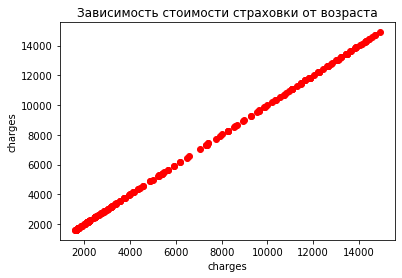

In [201]:
show_age_charges(df_3_new)

-

-

-

-

-

-

-

In [ ]:
# Решение (Задача 1)
def show_age_charges(df):
    plt.plot(df['age'], df['charges'], 'ro') 
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')
    plt.show()

(228, 7)


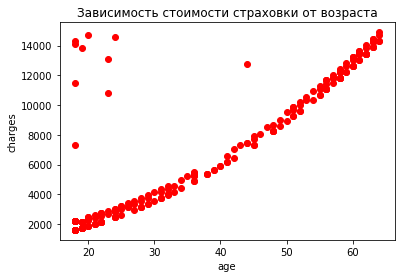

In [ ]:
df_new = df[(df.children==0) & (df.charges < 15000) & (df.sex == 'female')]
print(df_new.shape)

show_age_charges(df_new)

(218, 7)


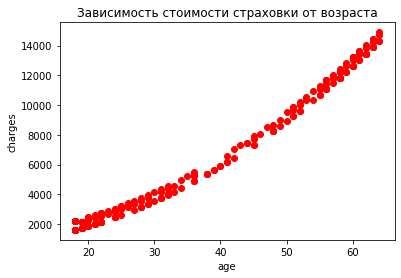

In [ ]:
# один из возможных вариантов удаления
indx = df_new[(df_new.charges >= 6000) & (df_new.age<30)].index
indx1 = df_new[(df_new.charges >= 12000) & (df_new.age<50)].index

df_new = df_new.drop(list(indx) + list(indx1))
print(df_new.shape)

show_age_charges(df_new)

In [ ]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(train[['age']], train.charges)
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

589.2828328455392

Замечание:
В видео мы обучали линейную регрессию на данных с выбросами, и ошибка была порядка ~1500$. Сейчас мы обучили модель без выбросов, и модель показала результат намного лучше. Линейная регрессия очень чувствительна к наличию выбросов в обучающей выборке. Поэтому данные нужно хорошо подготовить, прежде чем обучать на них линейную регрессию. 

-

-

-

In [ ]:
# Решение (Задача 2)
new_cols = ['age', 'bmi', 'charges']
train, test = train_test_split(df_new[new_cols], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(train.drop(['charges'], axis=1), train.charges)
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

590.8305083474556

-

-

-

In [ ]:
# Решение (Задача 3)
# смотрим какие колонки удалить
df_new.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,218.000000,218,218.000000,218.0,218,218,218.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,northeast,NaN
freq,NaN,218,NaN,NaN,218,58,NaN
mean,38.775229,NaN,30.310986,0.0,NaN,NaN,6739.594019
std,16.416243,NaN,5.958165,0.0,NaN,NaN,4455.839013
min,18.000000,NaN,17.290000,0.0,NaN,NaN,1607.510100
25%,22.000000,NaN,26.053750,0.0,NaN,NaN,2475.245350
50%,36.000000,NaN,29.925000,0.0,NaN,NaN,5269.996975
75%,56.000000,NaN,34.727500,0.0,NaN,NaN,11412.150800


In [ ]:
df_new2 = df_new.drop(['sex', 'children', 'smoker'], axis=1)

train, test = train_test_split(df_new2, test_size=0.2, random_state=42)
train.head()

,age,bmi,region,charges
521,32,44.220,southeast,3994.17780
579,25,23.465,northeast,3206.49135
671,29,31.160,northeast,3943.59540
789,62,29.920,southeast,13457.96080
523,38,37.730,southeast,5397.61670


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# кодируем с помощью ohe фичу region
ohe = OneHotEncoder(handle_unknown='ignore')
train_enc = pd.DataFrame(ohe.fit_transform(train[['region']]).toarray(), columns = ohe.categories_)
test_enc = pd.DataFrame(ohe.transform(test[['region']]).toarray(), columns = ohe.categories_)

train_enc.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
# добавляем преобразованную категориальную фичу в датафрейм. исходное представление фичи дропаем
train = train.join(train_enc.set_index(train.index)).drop(['region'], axis=1)
test = test.join(test_enc.set_index(test.index)).drop(['region'], axis=1)
train.head()

,age,bmi,charges,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
521,32,44.220,3994.17780,0.0,0.0,1.0,0.0
579,25,23.465,3206.49135,1.0,0.0,0.0,0.0
671,29,31.160,3943.59540,1.0,0.0,0.0,0.0
789,62,29.920,13457.96080,0.0,0.0,1.0,0.0
523,38,37.730,5397.61670,0.0,0.0,1.0,0.0


In [ ]:
lr.fit(train.drop(['charges'], axis=1), train.charges)
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


535.5915097964667